#### Introducing Optimization  
A network is now builts, we can pass data through it, we can calculate the loss, next step is to adjust the weights and biases to decrease the loss. To find an intelligent way to adjust the neurons input´s weights and biases in order to minimize the los is the main difficulty of neural networks.  
  
Initially one might consider option to randomly change the weights, reading the loss, repeat this untill we are happy with the lowest loss found. To demonstrate this we will use a simpler dataset.

In [1]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

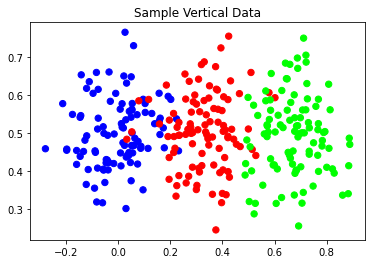

In [4]:
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1],
            c=y, 
            s=40,
            cmap='brg')
plt.title("Sample Vertical Data")
plt.show()            

Using the code we have created previously we can use this new limited data with a simple neural network.  
Need to run the previous full code in loss_function first.

In [9]:
import numpy as np

# Previously written classes

# Dense layer
class Layer_Dense:
    
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases
        
# ReLu activation
class Activation_ReLU:
    
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)
        
# Softmax activation
class Activation_Softmax:
    
    # Forward pass
    def forward(self, inputs):
        
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)
        
        self.output = probabilities

# Common loss class
class Loss:
    
    # calculate the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        
        # calculate sample losses
        sample_losses = self.forward(output, y)
        
        # calculate mean loss
        data_loss = np.mean(sample_losses)
        
        # return loss
        return data_loss

# Cross entropy loss
class Loss_CategoricalCrossentropy(Loss):
    
    # forward pass
    def forward(self, y_pred, y_true):
        
        # number of samples in a batch
        samples = len(y_pred)
        
        # clip data to prevent division by 0
        # clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        # probabilities for target values -
        # Only if cateogorical labels   [dog, cat, cat] , [0,1,1]
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for OHE labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped*y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

After running the code for the classes we can set up the simple neural network of for our Vertical data set

In [10]:
# create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)      # First dense layer, 2 inputs, 3 outputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)      # Seconde dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

Lets now create some variable to track the best loss and related weights and biases.

In [22]:
# Helper variables
lowest_loss = 99999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

We initialized the loss to a large value and will decrease it when a new and lower loss is found. We also copy weights and biases using `copy()` to make sure a full copy instead of reference to the object. Now we try to iterate as many times as we want, pick random values for weights and biases, then save the weights and biases if they generate the lowest-seen loss:

In [28]:
for iteration in range(100000):
    
    # Generate a new set of weights for iteration
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)
    
    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # Calculate values along first axis
    predictions = np.argmax(activation2.output, axis = 1)
    accuracy = np.mean(predictions == y)
    
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print("New set of weights found, iteration ", iteration,
              "loss: ", loss,
              "acc: ", accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss

New set of weights found, iteration  0 loss:  1.1006652 acc:  0.3333333333333333
New set of weights found, iteration  2 loss:  1.1001756 acc:  0.3333333333333333
New set of weights found, iteration  3 loss:  1.0988369 acc:  0.3333333333333333
New set of weights found, iteration  7 loss:  1.0987284 acc:  0.3333333333333333
New set of weights found, iteration  11 loss:  1.0986648 acc:  0.3333333333333333
New set of weights found, iteration  16 loss:  1.0986221 acc:  0.3333333333333333
New set of weights found, iteration  21 loss:  1.09757 acc:  0.3333333333333333
New set of weights found, iteration  408 loss:  1.0974619 acc:  0.34
New set of weights found, iteration  618 loss:  1.097431 acc:  0.3333333333333333
New set of weights found, iteration  634 loss:  1.096897 acc:  0.3333333333333333
New set of weights found, iteration  2463 loss:  1.0968695 acc:  0.3333333333333333
New set of weights found, iteration  2964 loss:  1.0968302 acc:  0.6633333333333333
New set of weights found, itera

Loss falls, but not by much. Accuracy did not improve, except for a singular situation where the model randomly found a set of weights yielding better accuracy. However, with a fairly large loss, this state is not stable. We can conclude that this does not appear to be a reliable method for minimizing loss. After running for 1 billion of iterations (from the book), the best results with lowest loss was: `loss: 1.0911305 acc: 0.333333333`  
  
Even with this basic dataset, we see that randomly searching for weight and bias combinations will take far too long to be an acceptable method. Another idea could be, instead of setting parameters with randomly chosen values each iteration, apply a fraction of these values to parameters. With this, weights will be updated from what currently yields us the lowest loss instead of aimlessly randomly. If the adjustment decreases loss, we make it the new point to adjust from. If loss instead increases due to adjustment, then we will revert to previous point. Using similar code from earliers, we will first change from randomly selecting weights and biases to randomly *adjusting* these:

In [31]:
 # Udate weights with some small random values
dense1.weights += 0.05 * np.random.randn(2, 3)
dense1.biases += 0.05 * np.random.randn(1, 3)
dense2.weights += 0.05 * np.random.randn(3, 3)
dense2.biases += 0.05 * np.random.randn(1, 3)

Then we will change our ending `if` statement to be:

In [32]:
# if los is smaller - print and save weights and biases aside
if loss < lowest_loss:
    print("New set of weights found, iteration ", iteration,
              "loss: ", loss,
              "acc: ", accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss
# Revert weights and biases
else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()

Full code up to this point

In [33]:
# create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)      # First dense layer, 2 inputs, 3 outputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)      # Seconde dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 99999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
    
    # Generate a new set of weights for iteration
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    
    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # Calculate values along first axis
    predictions = np.argmax(activation2.output, axis = 1)
    accuracy = np.mean(predictions == y)
    
    # if los is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print("New set of weights found, iteration ", iteration,
                  "loss: ", loss,
                  "acc: ", accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
# Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration  0 loss:  1.098234 acc:  0.3333333333333333
New set of weights found, iteration  8 loss:  1.0979 acc:  0.5933333333333334
New set of weights found, iteration  20 loss:  1.0974861 acc:  0.3333333333333333
New set of weights found, iteration  21 loss:  1.0971179 acc:  0.3333333333333333
New set of weights found, iteration  22 loss:  1.0957131 acc:  0.3333333333333333
New set of weights found, iteration  23 loss:  1.094928 acc:  0.3333333333333333
New set of weights found, iteration  26 loss:  1.093027 acc:  0.3333333333333333
New set of weights found, iteration  30 loss:  1.091621 acc:  0.5533333333333333
New set of weights found, iteration  33 loss:  1.0916046 acc:  0.49666666666666665
New set of weights found, iteration  34 loss:  1.085297 acc:  0.3333333333333333
New set of weights found, iteration  36 loss:  1.0748203 acc:  0.36
New set of weights found, iteration  40 loss:  1.0705974 acc:  0.5333333333333333
New set of weights found, iteration  51

Loss descended by a descent amount this time, and accuracy raised significantly. Applying a fraction of random values actually lead to a result that we could almost call some sort of solution. If you try 100 000 iterations, you will not progress much further.  
  
Let´s try it again with the *spiral dataset* instead.

In [35]:
# Try with sprial dataset instead
from nnfs.datasets import spiral_data

# create dataset
X, y = spiral_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)      # First dense layer, 2 inputs, 3 outputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)      # Seconde dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 99999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
    
    # Generate a new set of weights for iteration
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    
    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # Calculate values along first axis
    predictions = np.argmax(activation2.output, axis = 1)
    accuracy = np.mean(predictions == y)
    
    # if los is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print("New set of weights found, iteration ", iteration,
                  "loss: ", loss,
                  "acc: ", accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
# Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration  0 loss:  1.0989411 acc:  0.3333333333333333
New set of weights found, iteration  2 loss:  1.098805 acc:  0.3333333333333333
New set of weights found, iteration  3 loss:  1.098068 acc:  0.3333333333333333
New set of weights found, iteration  16 loss:  1.0977746 acc:  0.33666666666666667
New set of weights found, iteration  20 loss:  1.0977545 acc:  0.3566666666666667
New set of weights found, iteration  24 loss:  1.0974311 acc:  0.31
New set of weights found, iteration  33 loss:  1.0972637 acc:  0.32
New set of weights found, iteration  35 loss:  1.0958542 acc:  0.33
New set of weights found, iteration  48 loss:  1.0957701 acc:  0.35333333333333333
New set of weights found, iteration  52 loss:  1.0957057 acc:  0.34
New set of weights found, iteration  53 loss:  1.0940795 acc:  0.34
New set of weights found, iteration  55 loss:  1.0935097 acc:  0.32666666666666666
New set of weights found, iteration  62 loss:  1.0933009 acc:  0.3433333333333333
New se

This training sessions ended with almost no progress. Loss decreased slightly and accuracy is barely above the initial values. Leter we will learn that the most probably reason for this is called a *local mimimum* of loss. The data complexity is also not irrelevant here. It seems like hard problems are hard for a reason, we need to approach this problem in a more intelligent way. 